In [169]:
import pandas as pd

In [59]:
data = pd.read_csv("titanic.csv")
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
df.shape[0]

891

In [65]:
(df.isnull().sum()/df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df.select_dtypes(include = "float64").columns

Index(['Age', 'Fare'], dtype='object')

In [71]:
from sklearn.impute import SimpleImputer

In [105]:
si = SimpleImputer(strategy = "mean")
new_change = si.fit_transform(df[['Age', 'Fare']])

new_dataset = pd.DataFrame(new_change,columns = df.select_dtypes(include = "float64").columns)
new_dataset.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [89]:
new_dataset.isnull().sum()

Age     0
Fare    0
dtype: int64

In [77]:
df["Fare"].mean()

32.204207968574636

In [81]:
df["Age"].mean()

29.69911764705882

In [91]:
new_dataset.select_dtypes(include = "float64").isnull().sum()

Age     0
Fare    0
dtype: int64

In [93]:
encoding = df["Sex"]
encoding

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [103]:
pd.get_dummies(encoding).head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [99]:
pd.get_dummies(encoding).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   female  891 non-null    bool 
 1   male    891 non-null    bool 
dtypes: bool(2)
memory usage: 1.9 KB


In [111]:
neww = pd.DataFrame(encoding)
neww.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [107]:
from sklearn.preprocessing import OneHotEncoder

In [117]:
one = OneHotEncoder()
oneEncoder = one.fit_transform(neww).toarray()

In [123]:
encodata = pd.DataFrame(oneEncoder,columns = ["female","male"])
encodata.head()

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


# Label Encoding

In [143]:
dff = pd.DataFrame({"name" : ["Lucky","Shad","palli","Hitman","Batha","Gundu"]})
dff

,name
0,Lucky
1,Shad
2,palli
3,Hitman
4,Batha
5,Gundu


In [129]:
from sklearn.preprocessing import LabelEncoder

In [145]:
lEnco = LabelEncoder()
dff["Encoded_names"] = lEnco.fit_transform(dff["name"])

In [147]:
dff

,name,Encoded_names
0,Lucky,3
1,Shad,4
2,palli,5
3,Hitman,2
4,Batha,0
5,Gundu,1


In [149]:
data = pd.read_csv("loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [155]:
le = LabelEncoder()
le.fit(data["Property_Area"])

LabelEncoder()

In [161]:
data["Property_Area"] = le.transform(data["Property_Area"])

In [163]:
data["Property_Area"].unique()

array([2, 0, 1])

# Ordinal Encoding Using Scikit-Learn

In [187]:
d = pd.DataFrame({"size" : ["s","m","l","m","xl","xxl","xl","l","m","xl","s","xxl"]})
d.head(3)

,size
0,s
1,m
2,l


In [189]:
order_of_data  = [["s","m","l","xl","xxl"]]

In [177]:
from sklearn.preprocessing import OrdinalEncoder

In [191]:
oe = OrdinalEncoder(categories = order_of_data)
oe.fit(d[["size"]])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl', 'xxl']])

In [193]:
d["size_encoded"] = oe.transform(d[["size"]])

In [195]:
d

,size,size_encoded
0,s,0.0
1,m,1.0
2,l,2.0
3,m,1.0
4,xl,3.0
5,xxl,4.0
6,xl,3.0
7,l,2.0
8,m,1.0
9,xl,3.0


# Ordinal Encoding using map function

In [199]:
order = {"s" : 0,"m":1,"l":2,"xl":3,"xxl":4}

In [201]:
d["size_encoded_map"] = d["size"].map(order)

In [203]:
d

,size,size_encoded,size_encoded_map
0,s,0.0,0
1,m,1.0,1
2,l,2.0,2
3,m,1.0,1
4,xl,3.0,3
5,xxl,4.0,4
6,xl,3.0,3
7,l,2.0,2
8,m,1.0,1
9,xl,3.0,3


# Ordinal Encoding in a real DataSet

In [229]:
daata = pd.read_csv("loan.csv")
daata = pd.DataFrame(daata)
daata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [231]:
daata["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [233]:
ord_data = [["Rural","Semiurban","Urban"]]

In [235]:
from sklearn.preprocessing import OrdinalEncoder

In [239]:
oee = OrdinalEncoder(categories = ord_data)

In [241]:
daata["Property_Area"] = oee.fit_transform(daata[["Property_Area"]])

In [243]:
daata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,2.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,0.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,2.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,2.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,2.0,Y


In [245]:
daata["Property_Area"].unique()

array([2., 0., 1.])

# Removing Outliers Using IQR


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dd = pd.read_csv("loan.csv")
dd = pd.DataFrame(dd)
dd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
dd.describe() #in ApplicantIncome and CoapplicantIncome the difference between the mean and the max number is large ,which has a high chance of having the outliers 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


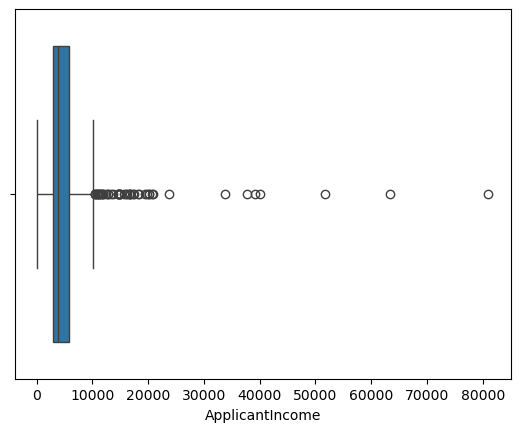

In [22]:
sns.boxplot(x = "ApplicantIncome",data = dd)
plt.show()

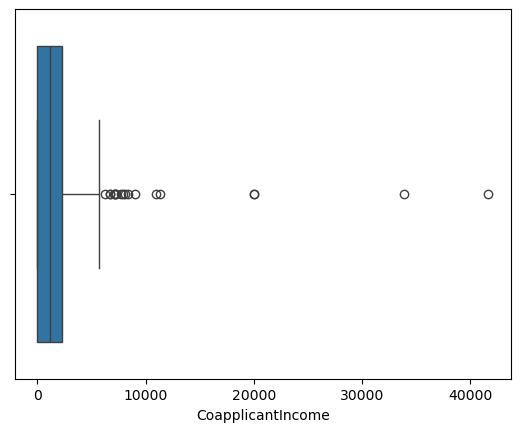

In [18]:
sns.boxplot(x = "CoapplicantIncome",data = dd)
plt.show()

In [25]:
dd.shape

(614, 13)

In [53]:
q1 = dd["ApplicantIncome"].quantile(0.25)
q3 = dd["ApplicantIncome"].quantile(0.75)

In [55]:
IQR = q3 - q1

In [57]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)
min_range , max_range

(-1498.75, 10171.25)

In [59]:
new_dd = dd[dd["ApplicantIncome"] <= max_range]
new_dd.shape

(564, 13)

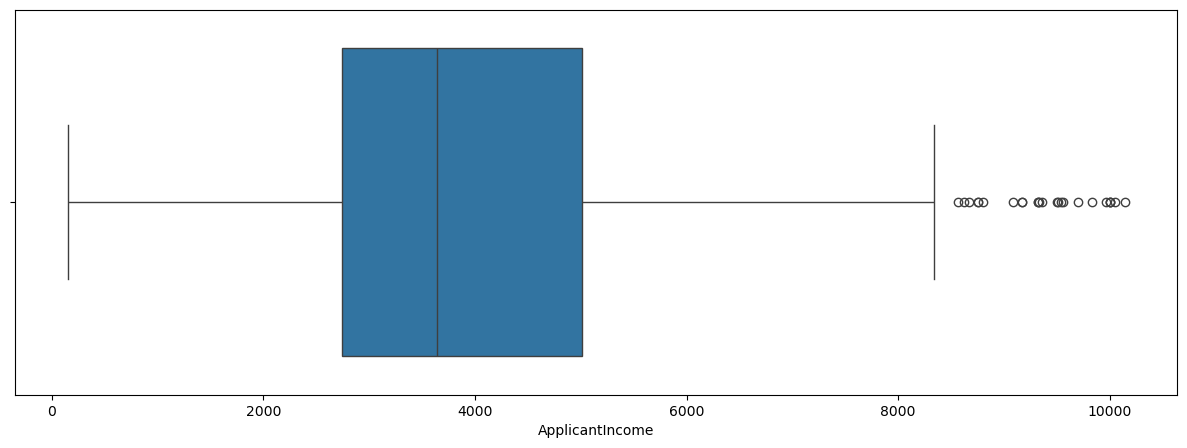

In [61]:
plt.figure(figsize = (15,5))
sns.boxplot(x = "ApplicantIncome",data = new_dd)
plt.show()

In [75]:
new_dd.loc[(new_dd["ApplicantIncome"] <=8300) & (new_dd["ApplicantIncome"] >= 10000)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [69]:
new_dd.query("ApplicantIncome <= 8300")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Removing Outliers Using Z-Score

In [80]:
ddd = pd.read_csv("loan.csv")
ddd = pd.DataFrame(ddd)
ddd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [82]:
minimum = ddd["ApplicantIncome"].mean() - (3*ddd["ApplicantIncome"].std())
maximum = ddd["ApplicantIncome"].mean() + (3*ddd["ApplicantIncome"].std())

In [84]:
minimum , maximum

(-12923.665736773899, 23730.584303549145)

In [86]:
n_data = ddd[ddd["ApplicantIncome"] <= maximum]
n_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [88]:
n_data.shape

(606, 13)

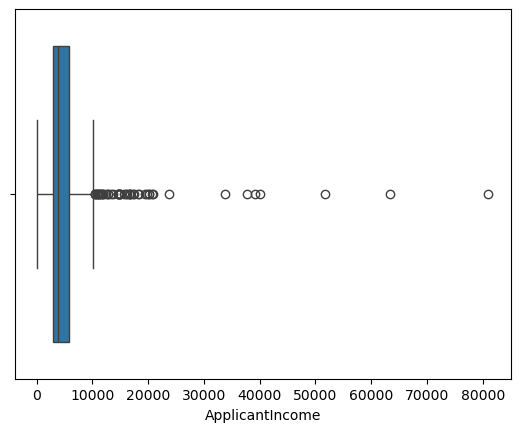

In [90]:
sns.boxplot(x = "ApplicantIncome",data = ddd)
plt.show()

# Feature Scaling (Standardization) Using Scikit_Learn

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
ds = pd.read_csv("loan.csv")
ds.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [97]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [99]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6400\366536472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds["ApplicantIncome"])


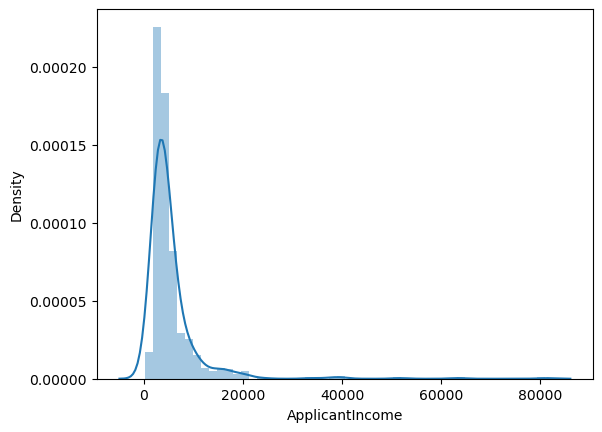

In [109]:
sns.distplot(ds["ApplicantIncome"])
plt.show()

In [107]:
from sklearn.preprocessing import StandardScaler

In [115]:
ss = StandardScaler()

In [117]:
ss.fit(ds[["ApplicantIncome"]])

StandardScaler()

In [121]:
ds["ApplicantIncome_ss"] = pd.DataFrame(ss.transform(ds[["ApplicantIncome"]]))

In [123]:
ds.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6400\3022852178.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds["ApplicantIncome"])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6400\3022852178.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds["ApplicantIncome_ss"])


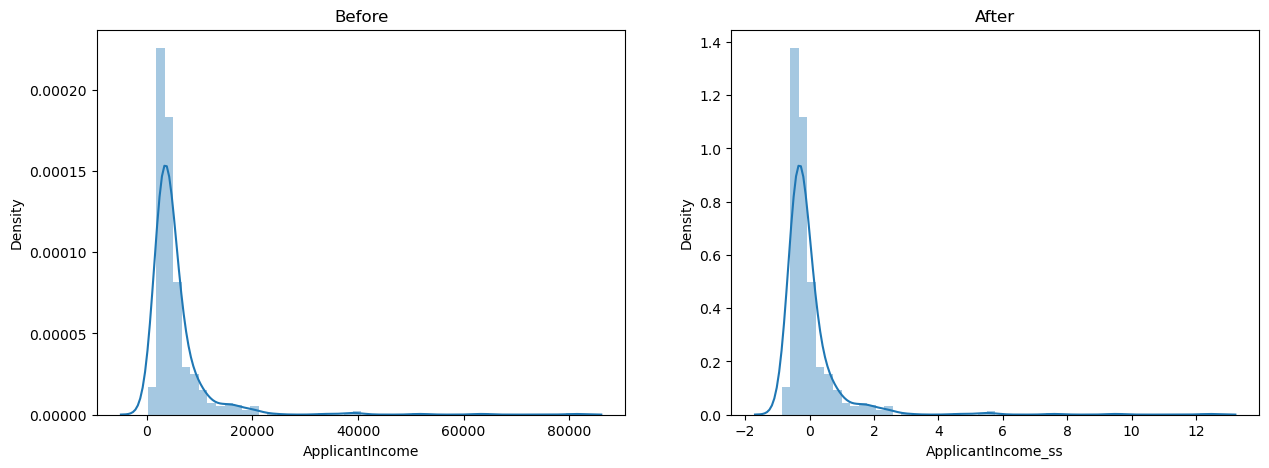

In [145]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(ds["ApplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(ds["ApplicantIncome_ss"])
plt.show()

# Feature Scaling (Normalization) Using Scikit_Learn

In [149]:
das = pd.read_csv("loan.csv")
das = pd.DataFrame(das)
das.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [151]:
from sklearn.preprocessing import MinMaxScaler

In [153]:
mms = MinMaxScaler()

In [155]:
mms.fit(das[["ApplicantIncome"]])

MinMaxScaler()

In [163]:
das["ApplicantIncome_Normalized"] = mms.transform(das[["ApplicantIncome"]])

In [177]:
das.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Nor,ApplicantIncome_Normalized
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.070489,0.070489
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0.054830,0.054830
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.035250,0.035250


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6400\3842162890.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(das["ApplicantIncome"])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6400\3842162890.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(das["ApplicantIncome_Normalized"])


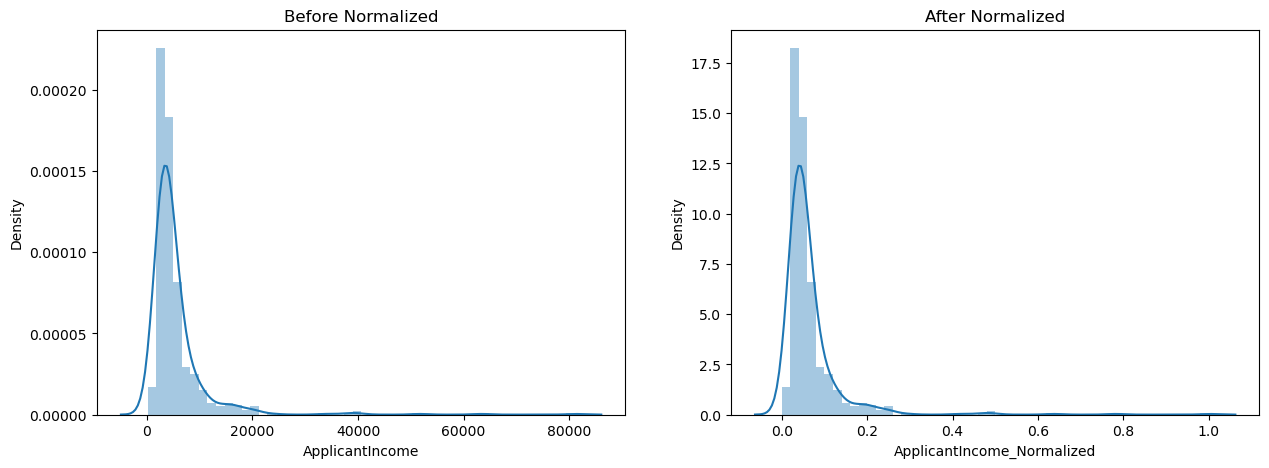

In [173]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.title("Before Normalized")
sns.distplot(das["ApplicantIncome"])

plt.subplot(1,2,2)
plt.title("After Normalized")
sns.distplot(das["ApplicantIncome_Normalized"])
plt.show()

# Function Transformer 

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [184]:
dasa = pd.read_csv("loan.csv")
dasa = pd.DataFrame(dasa)
dasa.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6400\3857434801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dasa["CoapplicantIncome"])


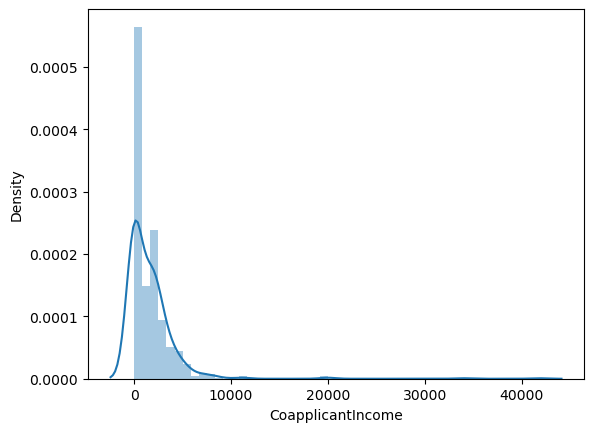

In [190]:
sns.distplot(dasa["CoapplicantIncome"])
plt.show()

In [188]:
q1 = dasa["CoapplicantIncome"].quantile(0.25)
q3 = dasa["CoapplicantIncome"].quantile(0.75)
IQR = q3 - q1

In [192]:
min_rr = q1 - (1.5*IQR)
max_rr = q3 + (1.5*IQR)
min_rr , max_rr

(-3445.875, 5743.125)

In [224]:
dasa = dasa[dasa["CoapplicantIncome"] <= max_rr]

In [198]:
dasa.shape

(596, 13)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6400\3857434801.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dasa["CoapplicantIncome"])


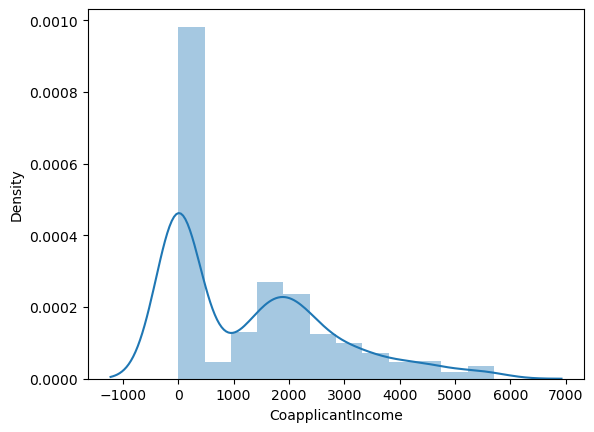

In [200]:
sns.distplot(dasa["CoapplicantIncome"])
plt.show()

In [202]:
from sklearn.preprocessing import FunctionTransformer

In [208]:
ft = FunctionTransformer(func=np.log1p)

In [210]:
ft.fit(dasa[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [228]:
dasa["CoapplicantIncome_tf"] = ft.transform(dasa[["CoapplicantIncome"]])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6400\2620170115.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dasa["CoapplicantIncome"])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6400\2620170115.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dasa["CoapplicantIncome_tf"])


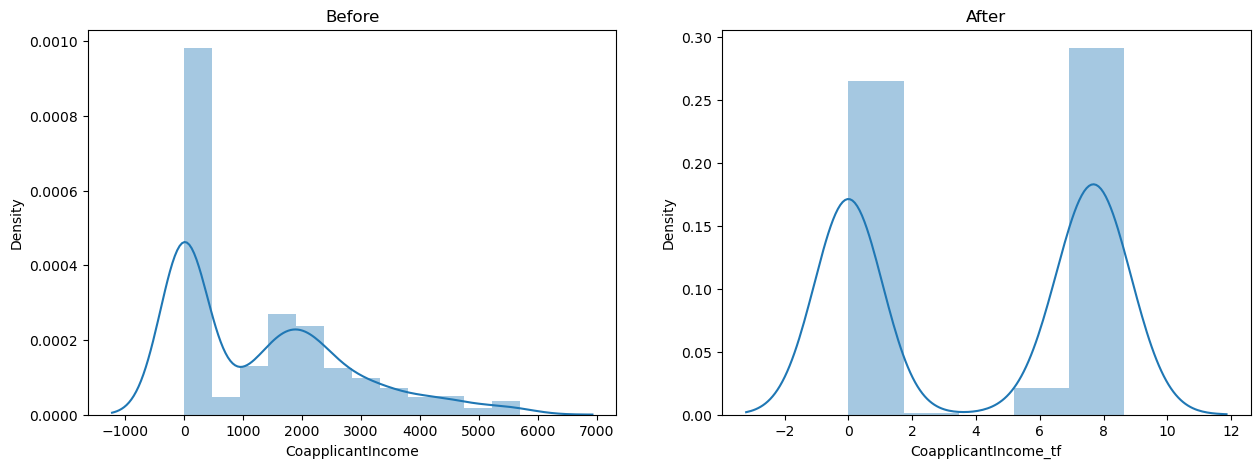

In [232]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dasa["CoapplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dasa["CoapplicantIncome_tf"])
plt.show()